In [1]:
import pandas_datareader.data as web
import datetime 
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 4, 25)

import time
from datetime import date


In [2]:
 ATT = web.DataReader("T", 'google', start, end)
    

In [3]:
#import matplotlib
import matplotlib.pyplot as plt
#import numpy as np
from pylab import *
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
import plotly 
plotly.tools.set_credentials_file(username='gulaysamatli', api_key='rV5Qqq9vdFoukLzVc4ee')

In [5]:
#from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
#plt.rcParams["figure.figsize"] = [15,12]
%matplotlib inline

In [6]:
ATT.head(n=5)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,28.41,28.61,28.28,28.58,29139478
2010-01-05,28.70,28.73,28.35,28.44,35234454
2010-01-06,27.95,28.03,27.55,27.61,37901928
2010-01-07,27.58,27.69,27.12,27.30,33600552
2010-01-08,27.29,27.39,26.88,27.10,27635225


In [7]:
ATT.describe()

,Open,High,Low,Close,Volume
count,1840.000000,1840.000000,1840.000000,1840.000000,1.840000e+03
mean,33.623065,33.834658,33.393522,33.624451,2.604515e+07
std,4.395780,4.413811,4.389860,4.408072,1.174995e+07
min,24.010000,24.390000,23.780000,24.130000,6.862360e+06
25%,30.265000,30.457500,30.117500,30.310000,1.932382e+07
50%,34.100000,34.340000,33.900000,34.120000,2.358805e+07
75%,35.992500,36.202500,35.720000,35.992500,2.934611e+07
max,43.500000,43.890000,43.330000,43.470000,1.260064e+08


In [8]:
import seaborn as sns
sns.set(style='ticks', context='talk')

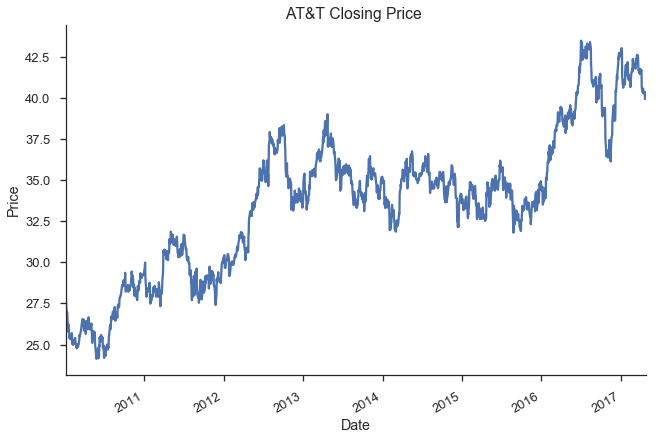

In [11]:
plt.figure()
#ATT.Close.plot()
fig1 = ATT.Close.plot(label='Close')
fig1.set(ylabel='Price', title = 'AT&T Closing Price ')
sns.despine()

In [12]:
MonthlyAvg=ATT['Close'].resample('M').mean()


In [13]:
MonthlyAvg.head(n=5)

Date
2010-01-31    26.426316
2010-02-28    25.154737
2010-03-31    25.740435
2010-04-30    26.193333
2010-05-31    25.250500
Freq: M, Name: Close, dtype: float64

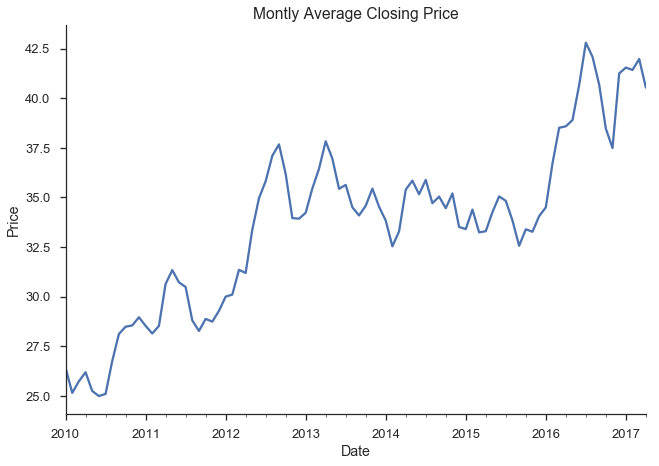

In [15]:
plt.figure()
#ATT.Close.plot()
fig2 = MonthlyAvg.plot(label='Montly Average Price')
fig2.set(ylabel='Price', title = 'Montly Average Closing Price')
sns.despine()

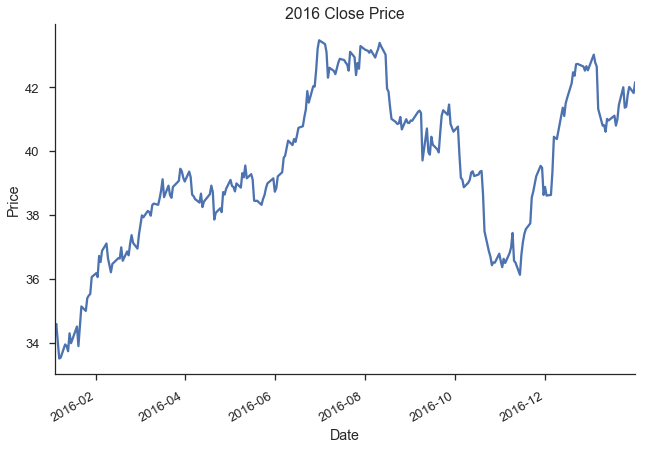

In [16]:
#ATT['2016-01':'2017-01']['Close'].plot()
plt.figure()
fig3 = ATT['2016-01':'2017-01']['Close'].plot(label='Close')
fig3.set(ylabel='Price', title = '2016 Close Price')
sns.despine()

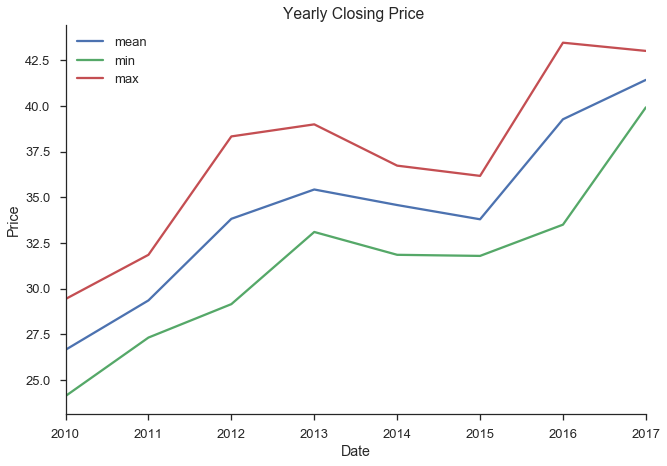

In [17]:
ATT_mean = ATT['Close'].resample("A").apply(['mean','std',min,max])
#ATT_mean.plot(subplots=True)
ATT['Close'].resample("A").apply(['mean',min,max]).plot().set(ylabel='Price', title = 'Yearly Closing Price ')
sns.despine()



In [18]:
ATT_mean

,mean,std,min,max
Date,,,,
2010-12-31,26.660794,1.534712,24.13,29.44
2011-12-31,29.364048,1.183328,27.33,31.86
2012-12-31,33.829960,2.607446,29.16,38.34
2013-12-31,35.434722,1.253224,33.11,39.00
2014-12-31,34.583849,1.150768,31.86,36.74
2015-12-31,33.804048,0.882334,31.80,36.18
2016-12-31,39.278214,2.406045,33.51,43.47
2017-12-31,41.433718,0.725669,39.93,43.02


In [19]:
#Lagged difference Xt - X(t-1)
#ATT_Diff = ATT.diff(periods = 1)
#ATT_Diff.head(n=5)

In [20]:
Price_Diff = ATT['Close']- ATT['Open'] 

In [21]:
Price_Diff.head(5)

Date
2010-01-04    0.17
2010-01-05   -0.26
2010-01-06   -0.34
2010-01-07   -0.28
2010-01-08   -0.19
dtype: float64

In [22]:
ATT_Change = ((ATT['Close'] - ATT['Open'])/ATT['Open'])*100

ATT_Change.describe()

count    1840.000000
mean        0.002566
std         0.811535
min        -4.621567
25%        -0.481336
50%         0.028682
75%         0.490302
max         3.084366
dtype: float64

In [36]:
ATT_Change.head(5)

Date
2012-01-03   -0.262640
2012-01-04   -0.490517
2012-01-05   -0.295179
2012-01-06   -1.296974
2012-01-09   -0.503184
dtype: float64

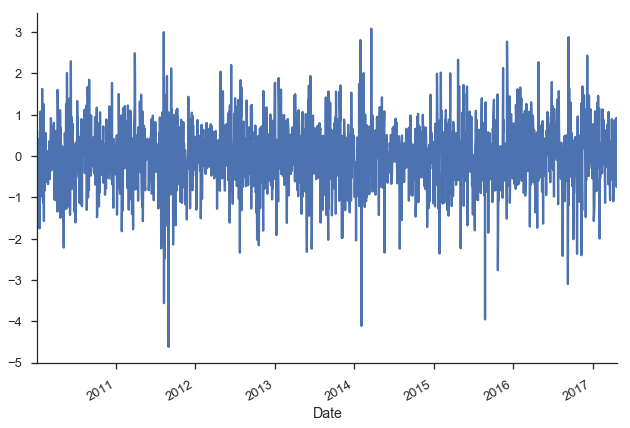

In [23]:
ATT_Change.plot(subplots = False)
sns.despine()

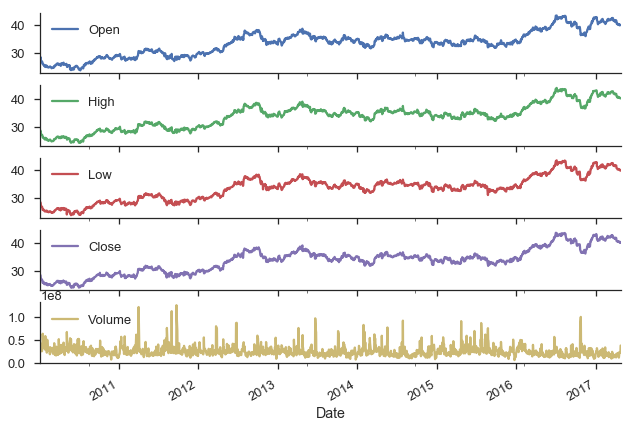

In [24]:
ATT.plot(subplots=True)
sns.despine()


In [31]:
Year_2010 = go.Box(
    y=ATT.Close['2010'],
    name = '2010'
)
Year_2011 = go.Box(
    y=ATT.Close['2011'],
    name = '2011'
)
Year_2012 = go.Box(
    y=ATT.Close['2012'],
    name = '2012'
)
Year_2013 = go.Box(
    y=ATT.Close['2013'],
    name = '2013'
)
Year_2014 = go.Box(
    y=ATT.Close['2014'],
    name = '2014'
)
Year_2015 = go.Box(
    y=ATT.Close['2015'],
    name = '2015'
)
Year_2016 = go.Box(
    y=ATT.Close['2016'],
    name = '2016'
)
layout = go.Layout(
    title = "Closing Prices",
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
year = [Year_2010, Year_2011, Year_2012, Year_2013, Year_2014, Year_2015, Year_2016]
fig = go.Figure(data=year, layout=layout)

py.iplot(fig)

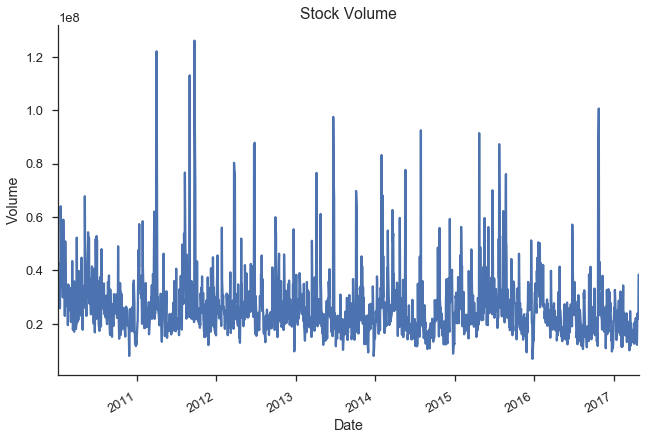

In [32]:
plt.figure()
fig4 = ATT['Volume'].plot(label='Volume')
fig4.set(ylabel='Volume', title = 'Stock Volume')
sns.despine()

In [61]:
ATT['Volume'].groupby(ATT.index.year).describe()

2010  count    2.520000e+02
      mean     2.825483e+07
      std      9.434361e+06
      min      7.982650e+06
      25%      2.147198e+07
      50%      2.663571e+07
      75%      3.332658e+07
      max      6.776258e+07
2011  count    2.520000e+02
      mean     2.875546e+07
      std      1.594758e+07
      min      1.203676e+07
      25%      2.087334e+07
      50%      2.424059e+07
      75%      3.128556e+07
      max      1.260064e+08
2012  count    2.500000e+02
      mean     2.679519e+07
      std      1.088170e+07
      min      9.673495e+06
      25%      2.119354e+07
      50%      2.421540e+07
      75%      2.838591e+07
      max      8.778717e+07
2013  count    2.520000e+02
      mean     2.394342e+07
      std      1.110785e+07
      min      7.960023e+06
      25%      1.816746e+07
      50%      2.165155e+07
                   ...     
2014  std      1.174372e+07
      min      8.831944e+06
      25%      1.736073e+07
      50%      2.166069e+07
      75%      2.896

In [58]:
YearV_2010 = go.Scatter(
    #x=ATT.index,
    y=ATT.Volume['2010'],
    name = '2010'
)
YearV_2011 = go.Scatter(
    #x=ATT.index,
    y=ATT.Volume['2011'],
    name = '2011'
)
YearV_2012 = go.Scatter(
    #x=ATT.index,
    y=ATT.Volume['2012'],
    name = '2012'
)
YearV_2013 = go.Scatter(
    #x=ATT.index,
    y=ATT.Volume['2013'],
    name = '2013'
)
YearV_2014 = go.Scatter(
    #x=ATT.index,
    y=ATT.Volume['2014'],
    name = '2014'
)
YearV_2015 = go.Scatter(
    #x=ATT.index,
    y=ATT.Volume['2015'],
    name = '2015'
)
YearV_2016 = go.Scatter(
    #x=ATT.index,
    y=ATT.Volume['2016'],
    name = '2016'
)
layout = go.Layout(
    title = "Stock Volume",
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)
year = [YearV_2010, YearV_2011, YearV_2012, YearV_2013, YearV_2014, YearV_2015, YearV_2016]
fig = go.Figure(data=year, layout=layout)

py.iplot(fig)